In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', None)

> Dataset: https://www.kaggle.com/code/trondataana/alzheimer-prediction-0-853-accuracy

### Data Description

- **Group:** Indicates whether the subject is "Demented" or "Nondemented".
- **M/F:** The gender of the subject (M for Male, F for Female).
- **Age:** Age of the subject.
- **EDUC:** The level of education (in years).
- **SES:** Socioeconomic status.
- **MMSE:** Mini-Mental State Examination score, a measure of cognitive function, with missing values in some rows.
- **CDR:** Clinical Dementia Rating, a standard measure for staging dementia.
- **eTIV:** Estimated Total Intracranial Volume.
- **nWBV:** Normalized Whole Brain Volume.
- **ASF:** Atlas Scaling Factor, used to normalize brain measurements.

### target Class (Group)
- Dementia
- Non-dementia 
- not using (converted)

### features 
- 9 features 

### source of the data 
- https://sites.wustl.edu/oasisbrains/
- https://www.sciencedirect.com/science/article/pii/S2352914819300917?via%3Dihub

### tips 
- use decision tree in order to select features 

- Dementia and Alzheimer's are related but not the same. Dementia is an umbrella term for a range of conditions that affect cognitive function, such as memory, thinking, and reasoning. Alzheimer's disease is the most common cause of dementia, accounting for about 60-80% of cases.

### source of the data 
- https://sites.wustl.edu/oasisbrains/
- https://www.sciencedirect.com/science/article/pii/S2352914819300917?via%3Dihub

**Machine Learning in Medicine: Performance Calculation of Dementia Prediction by Support Vector Machines (SVM)**
**Key Insights**:

1. **Machine Learning Application**:
   - SVM was used to classify dementia patients by analyzing MRI data and other attributes.
   - Explored the impact of parameters like **gamma** and **C (regularization)** on SVM performance.

2. **Key Attributes for Prediction**:
   - Most relevant attributes: **MMSE (Mini Mental State Exam)**, **CDR (Clinical Dementia Rating)**, **Age**, **nWBV (Normalized Whole Brain Volume)**.
   - **Demographic factors** like gender and education were not as effective for dementia prediction.

3. **Performance**:
   - Achieved **70% accuracy** in dementia prediction.
   - Precision for non-demented: **64.18%**, demented: **75%**.
   - Identified optimal hyperplane using **low gamma (1.0E-4)** and **high C (100)**.

4. **Limitations**:
   - Small sample size may have limited the accuracy of the prediction.
   - Suggests expanding the dataset and improving classification techniques for future work.

**Conclusion**:
- This study demonstrates the use of SVM in medical imaging for dementia prediction and highlights the importance of hyperparameter tuning for model optimization.

In [4]:
df = pd.read_csv("../Data/alzheimer.csv")
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


In [6]:
# checking for garbage values 
# Set display options to show more rows and columns (adjust as necessary)
pd.set_option('display.max_rows', 100)  # Adjust the number of rows to display as per your need
pd.set_option('display.max_columns', None)  # Display all columns

# Check for out-of-range values for Age (between 60 and 98)
age_outliers = df[(df['Age'] < 60) | (df['Age'] > 98)]

# Check for out-of-range values for EDUC (between 0 and 23 years)
educ_outliers = df[(df['EDUC'] < 0) | (df['EDUC'] > 23)]

# Check for out-of-range values for MMSE (between 0 and 30, as MMSE scores range between 0 and 30)
mmse_outliers = df[(df['MMSE'] < 0) | (df['MMSE'] > 30)]

# Check for out-of-range values for SES (Socioeconomic status is often between 1 and 5, adjust as per your data)
ses_outliers = df[(df['SES'] < 1) | (df['SES'] > 5)]

# Check for out-of-range values for CDR (Clinical Dementia Rating, values are typically between 0 and 3)
cdr_outliers = df[(df['CDR'] < 0) | (df['CDR'] > 3)]

# Check for unexpected values in categorical columns
unexpected_group_values = df[~df['Group'].isin(['Demented', 'Nondemented'])]
unexpected_gender_values = df[~df['M/F'].isin(['M', 'F'])]

# Verify no outliers or unexpected values
if (age_outliers.empty and educ_outliers.empty and mmse_outliers.empty and ses_outliers.empty and 
    cdr_outliers.empty and unexpected_group_values.empty and unexpected_gender_values.empty):
    print("No garbage values found in the dataset.")
else:
    print("Garbage values detected.")
    
    if not age_outliers.empty:
        print("\n--- Age outliers ---")
        print(age_outliers)
    
    if not educ_outliers.empty:
        print("\n--- Education outliers ---")
        print(educ_outliers)
    
    if not mmse_outliers.empty:
        print("\n--- MMSE outliers ---")
        print(mmse_outliers)

    if not ses_outliers.empty:
        print("\n--- SES outliers ---")
        print(ses_outliers)
    
    if not cdr_outliers.empty:
        print("\n--- CDR outliers ---")
        print(cdr_outliers)
    
    if not unexpected_group_values.empty:
        print("\n--- Unexpected values in Group ---")
        print(unexpected_group_values)
    
    if not unexpected_gender_values.empty:
        print("\n--- Unexpected values in Gender ---")
        print(unexpected_gender_values)


Garbage values detected.

--- Unexpected values in Group ---
         Group M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
33   Converted   F   87    14  1.0  30.0  0.0  1406  0.715  1.248
34   Converted   F   88    14  1.0  29.0  0.0  1398  0.713  1.255
35   Converted   F   92    14  1.0  27.0  0.5  1423  0.696  1.234
36   Converted   M   80    20  1.0  29.0  0.0  1587  0.693  1.106
37   Converted   M   82    20  1.0  28.0  0.5  1606  0.677  1.093
38   Converted   M   84    20  1.0  26.0  0.5  1597  0.666  1.099
57   Converted   F   86    12  3.0  30.0  0.0  1430  0.718  1.227
58   Converted   F   88    12  3.0  30.0  0.0  1445  0.719  1.215
59   Converted   F   91    12  3.0  28.0  0.5  1463  0.696  1.199
81   Converted   F   71    16  1.0  27.0  0.0  1289  0.771  1.362
82   Converted   F   73    16  1.0  28.0  0.0  1295  0.768  1.356
83   Converted   F   75    16  1.0  28.0  0.5  1314  0.760  1.335
114  Converted   F   85    18  1.0  29.0  0.0  1264  0.701  1.388
115  Converted 

In [7]:
# Count the number of missing values per column
missing_values_per_column = df.isnull().sum()
print("Missing values per column:")
print(missing_values_per_column)

Missing values per column:
Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64


In [8]:
# Remove rows with any missing values
df = df.dropna()
df = df[df['Group'] != 'Converted']
# Optional: Check the result
print(df)


           Group M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0    Nondemented   M   87    14  2.0  27.0  0.0  1987  0.696  0.883
1    Nondemented   M   88    14  2.0  30.0  0.0  2004  0.681  0.876
5    Nondemented   F   88    18  3.0  28.0  0.0  1215  0.710  1.444
6    Nondemented   F   90    18  3.0  27.0  0.0  1200  0.718  1.462
7    Nondemented   M   80    12  4.0  28.0  0.0  1689  0.712  1.039
..           ...  ..  ...   ...  ...   ...  ...   ...    ...    ...
368     Demented   M   82    16  1.0  28.0  0.5  1693  0.694  1.037
369     Demented   M   86    16  1.0  26.0  0.5  1688  0.675  1.040
370  Nondemented   F   61    13  2.0  30.0  0.0  1319  0.801  1.331
371  Nondemented   F   63    13  2.0  30.0  0.0  1327  0.796  1.323
372  Nondemented   F   65    13  2.0  30.0  0.0  1333  0.801  1.317

[317 rows x 10 columns]


In [9]:
# Convert group to numerical values
df["Group"] = df["Group"].map({"Nondemented": 0, "Demented": 1, "Converted": 2})

# Convert gender to numerical values
df["M/F"] = df["M/F"].map({"M": 0, "F": 1})
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,0,1,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,0,1,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,0,0,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...
368,1,0,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,1,0,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,0,1,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,0,1,63,13,2.0,30.0,0.0,1327,0.796,1.323


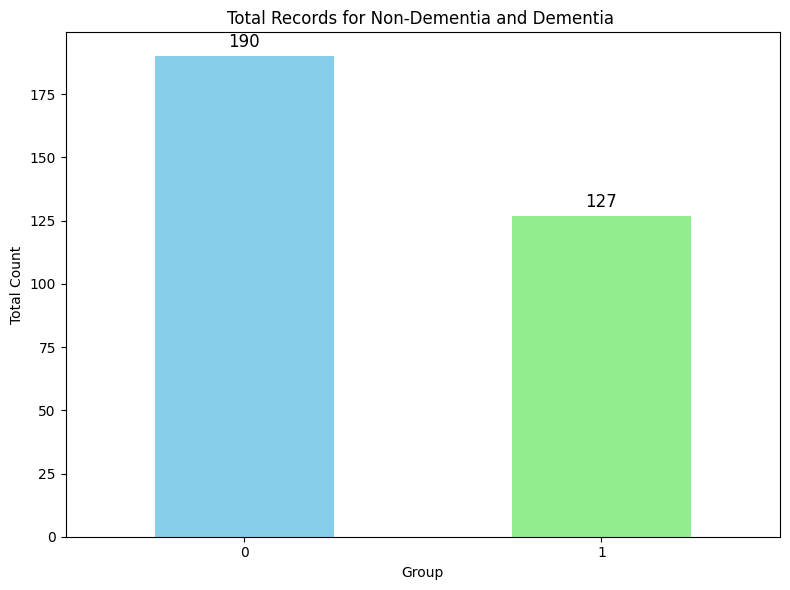

In [10]:
# Count the number of records for each group (Demented, Nondemented, Converted)
group_counts = df['Group'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
ax = group_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'], rot=0)

# Annotate the bar chart with exact values
for i, count in enumerate(group_counts):
    ax.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('Total Records for Non-Dementia and Dementia ')
plt.xlabel('Group')
plt.ylabel('Total Count')

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

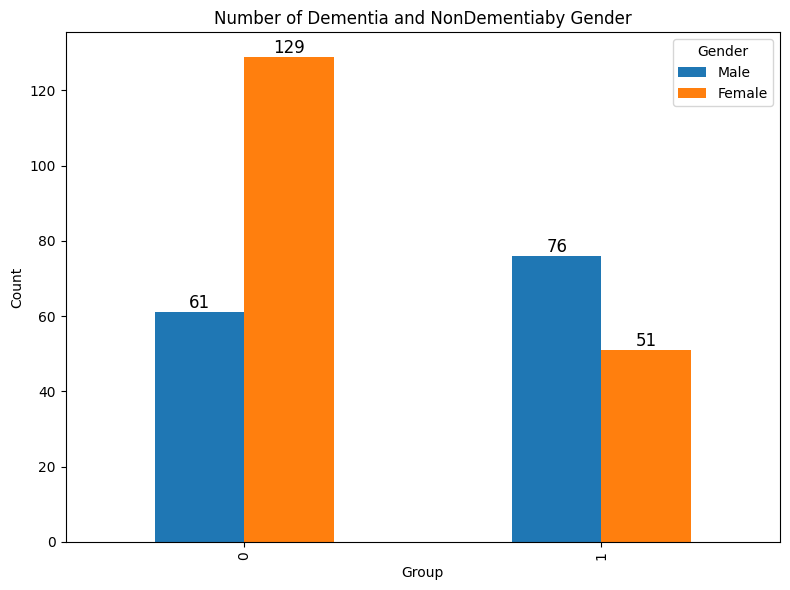

In [11]:
# Count the number of Dementia, NonDementia, and Converted for each gender
gender_group_counts = df.groupby(['Group', 'M/F']).size().unstack()

# Plot the bar chart
plt.figure(figsize=(8, 6))
ax = gender_group_counts.plot(kind='bar', figsize=(8, 6))

# Add values on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)

# Add labels and title
plt.title('Number of Dementia and NonDementiaby Gender')
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(['Male', 'Female'], title='Gender')

# Display the plot
plt.tight_layout()
plt.show()

### Female (F) Population
- **Total:** 180
  - **Non-Dementia (0):** 71.66% 
  - **Dementia (1):** 28.33%

### Male (M) Population
- **Total:** 137
  - **Non-Dementia (0):** 44.52%
  - **Dementia (1):** 55.47%


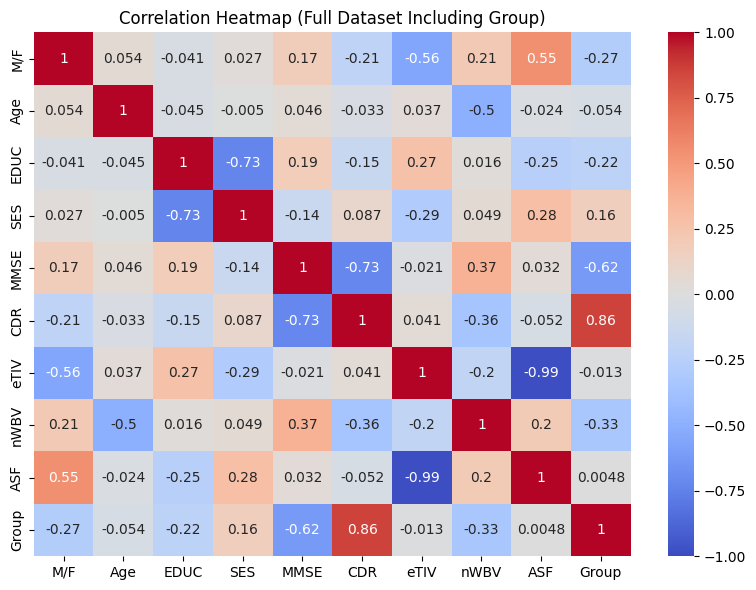

In [12]:
# Function to generate heatmap for the full dataset (including 'Group')
def plot_heatmap_for_full_data():
    # Numeric columns to include in the heatmap (including 'Group')
    numeric_cols = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'Group']
    
    # Fill NaN values with the mean of each column
    df_numeric = df[numeric_cols].fillna(df[numeric_cols].mean())
    
    # Compute correlation matrix
    corr_matrix = df_numeric.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap (Full Dataset Including Group)')
    plt.tight_layout()
    plt.show()

# Call the function to plot the heatmap
plot_heatmap_for_full_data()


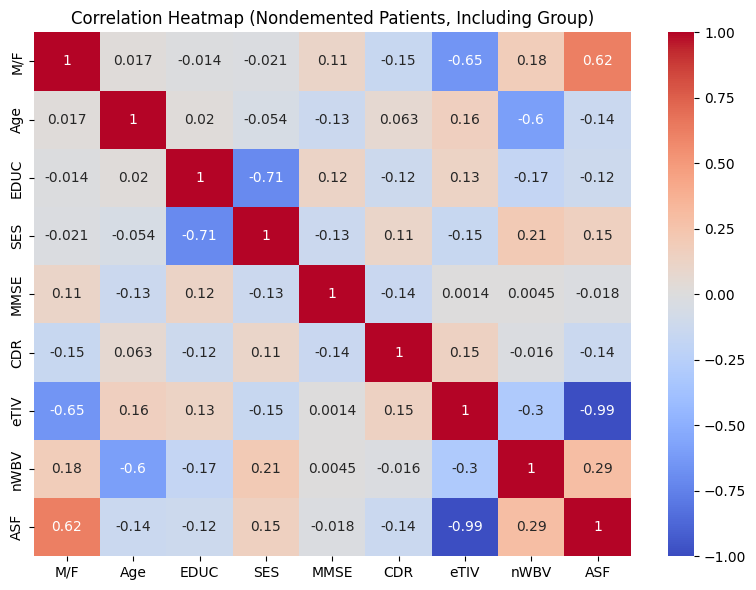

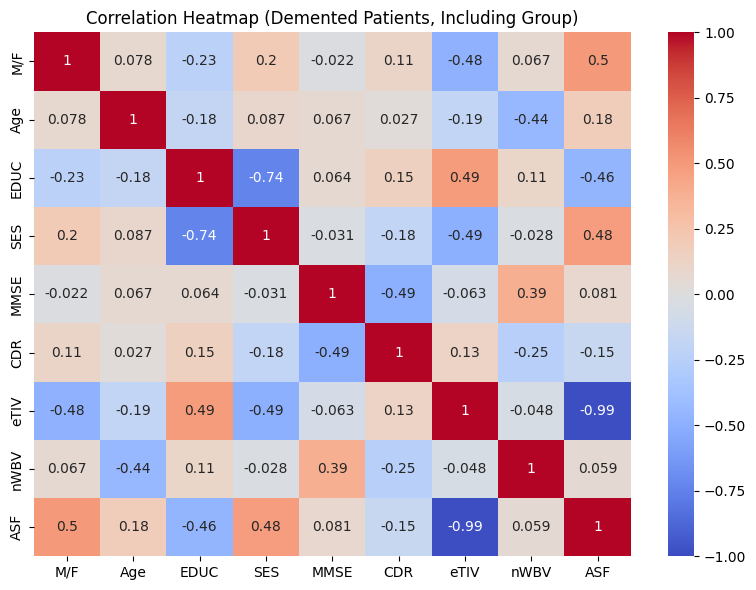

In [13]:
# Numeric columns to include in the heatmap (including 'Group')
numeric_cols = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# Function to generate heatmap for a specific group, including 'Group'
def plot_heatmap_for_group(group_label, group_number):
    # Filter data by the specified group
    group_data = df[df['Group'] == group_number]
    
    # Fill NaN values with the mean of each column
    group_data_numeric = group_data[numeric_cols].fillna(group_data[numeric_cols].mean())
    
    # Compute correlation matrix
    corr_group = group_data_numeric.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_group, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap ({group_label} Patients, Including Group)')
    plt.tight_layout()
    plt.show()

# Generate heatmap for Nondemented group (Group = 0) including 'Group'
plot_heatmap_for_group('Nondemented', 0)

# Generate heatmap for Demented group (Group = 1) including 'Group'
plot_heatmap_for_group('Demented', 1)


<Axes: xlabel='ASF', ylabel='Count'>

<Figure size 1000x600 with 0 Axes>

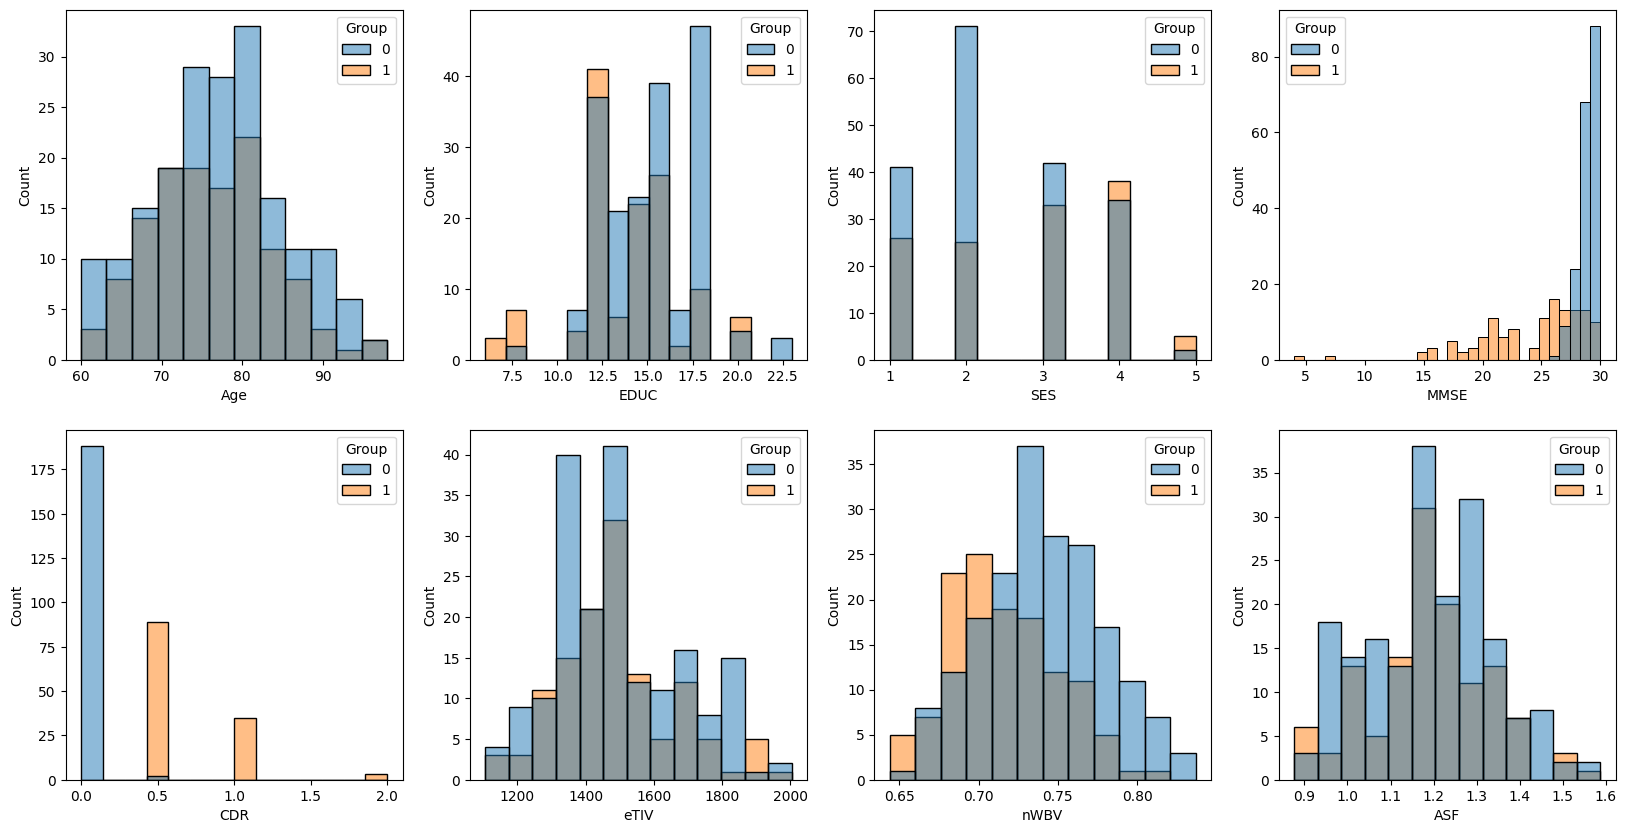

In [14]:
# Histogram distribution with groups
plt.figure(figsize=(10, 6))
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
sns.histplot(data=df, x='Age', hue='Group', ax=axs[0, 0])
sns.histplot(data=df, x='EDUC', hue='Group', ax=axs[0, 1])
sns.histplot(data=df, x='SES', hue='Group', ax=axs[0, 2])
sns.histplot(data=df, x='MMSE', hue='Group', ax=axs[0, 3])
sns.histplot(data=df, x='CDR', hue='Group', ax=axs[1, 0])
sns.histplot(data=df, x='eTIV', hue='Group', ax=axs[1, 1])
sns.histplot(data=df, x='nWBV', hue='Group', ax=axs[1, 2])
sns.histplot(data=df, x='ASF', hue='Group', ax=axs[1, 3])

- **Questions**
- How does age relate to dementia diagnosis?
- What role does education play in dementia?
- Is there a relationship between socioeconomic status (SES) and dementia?
- How do dementia and non-dementia individuals differ in cognitive function (as measured by MMSE)?
- How does the Clinical Dementia Rating (CDR) differentiate dementia and non-dementia groups
- Does brain volume (eTIV and nWBV) differ between demented and non-demented individuals?
- Is the Atlas Scaling Factor (ASF) related to dementia?

- **insights and conclusion**
    - **Age:** dementia and non-dementia have a similar distribution, with dementia groups mostly between 70-82 years. 
    - **Education (EDUC):** Non-dementia individuals have higher education (15-20 years), while dementia individuals have lower education (12-15 years).
    - **Socioeconomic Status (SES):** Non-dementia individuals have lower SES, while dementia individuals increase as ses increases 
    - **MMS (mini mental stat exam):** Non-dementia individuals score higher (score < 25), dementia individuals show a wider range.
    - **CDR (Clinical Dementia Rating):** Non-dementia individuals have CDR at 0, while dementia individuals have values between 0.5-2.
    - **eTIV(Estimated Total Intracranial Volume):** Individuals with dementia tend to have lower eTIV values compared to non-demented individuals (see yellow).
    - **nWBV(Normalized Whole Brain Volume)** The nondemented group tends to have slightly higher normalized brain volumes (nWBV >  0.71) compared to the demented group.
    - **ASF(Atlas Scaling Factor):** ASF is evenly distributed across all groups with minimal variation with some overlap at the extremes.





<Figure size 1200x1000 with 0 Axes>

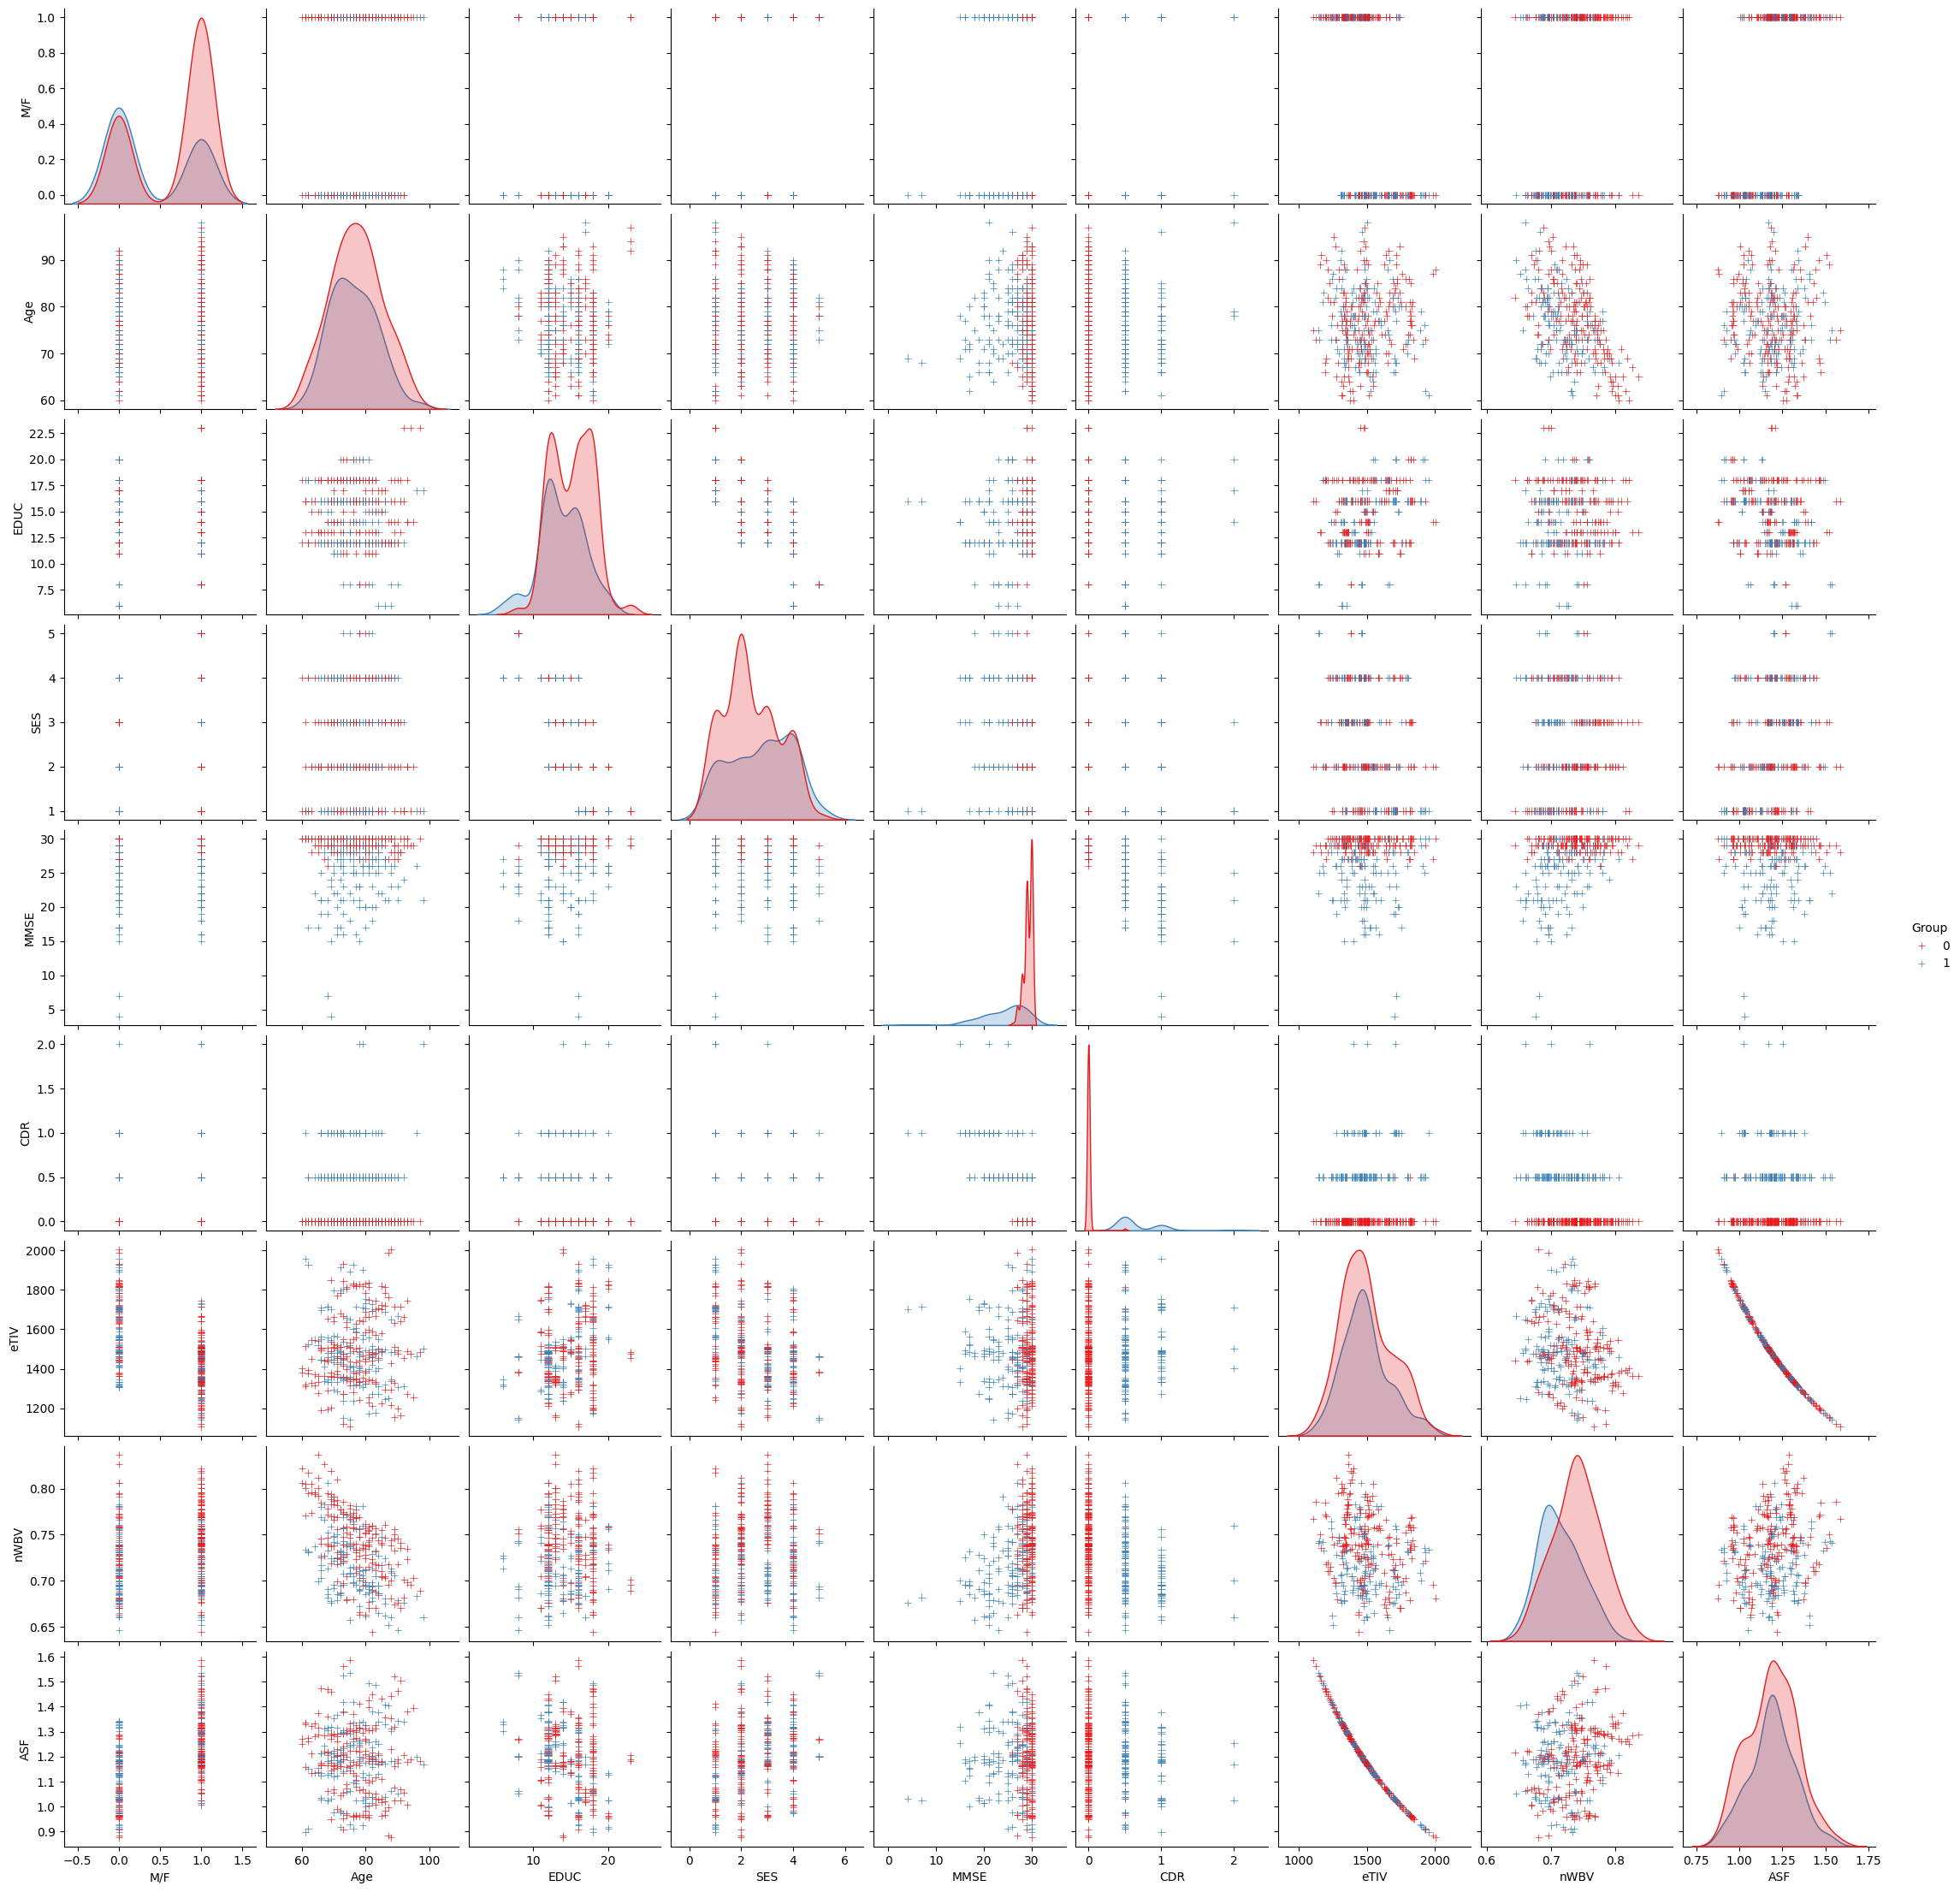

In [15]:
#pairplot
fig = plt.figure(figsize=(12, 10))  # Increase figure size
sns.pairplot(data=df, hue="Group", markers=["+", "+"], palette="Set1")

<Axes: xlabel='M/F', ylabel='ASF'>

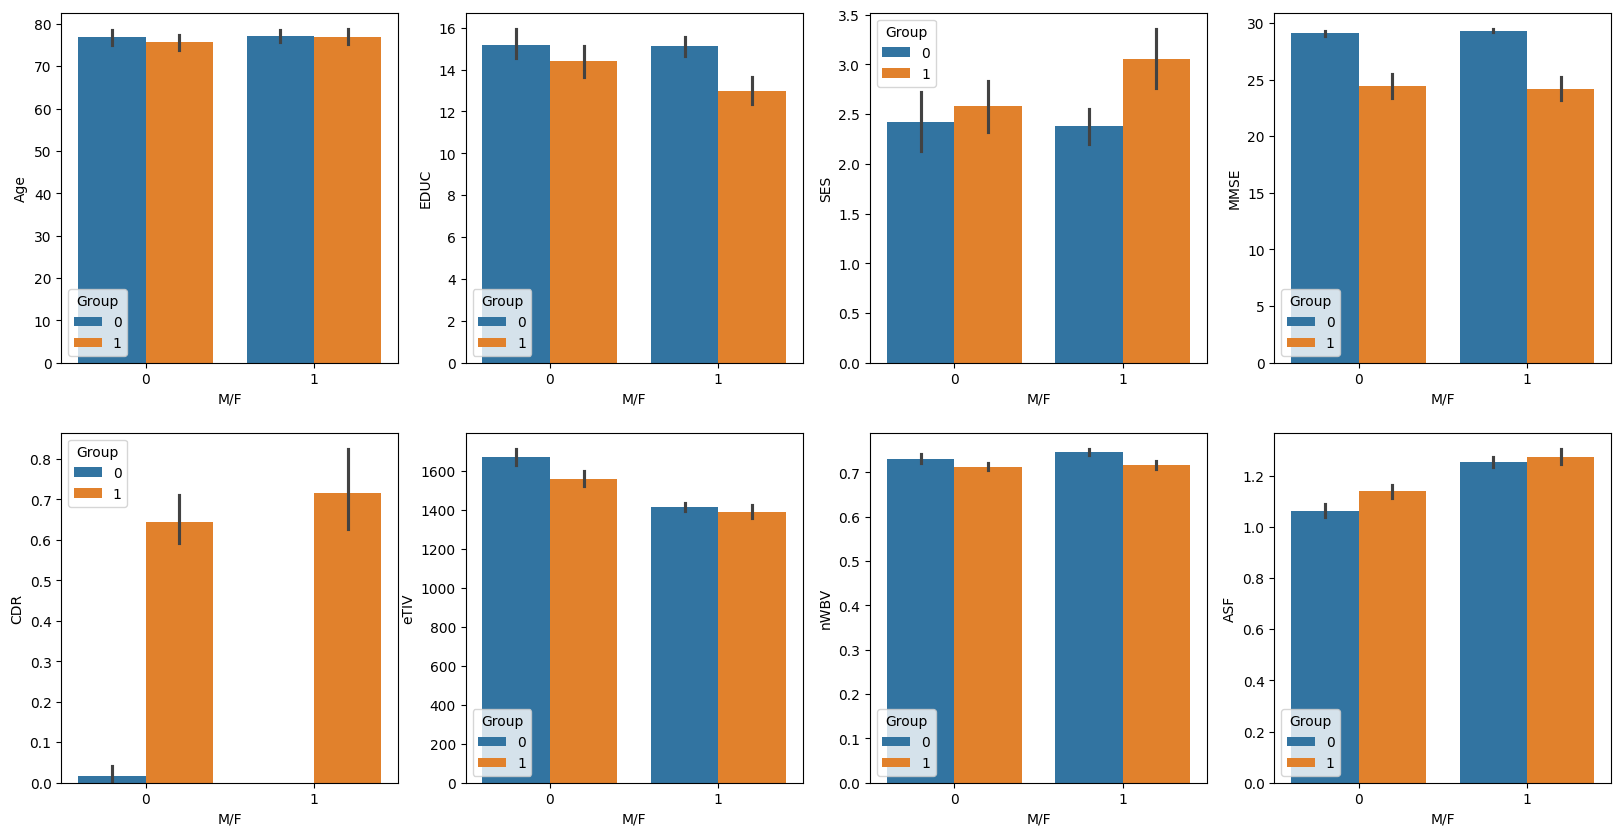

In [16]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
sns.barplot(data=df, x='M/F', y='Age', hue='Group', ax=axs[0, 0])
sns.barplot(data=df, x='M/F', y='EDUC', hue='Group', ax=axs[0, 1])
sns.barplot(data=df, x='M/F', y='SES', hue='Group', ax=axs[0, 2])
sns.barplot(data=df, x='M/F', y='MMSE', hue='Group', ax=axs[0, 3])
sns.barplot(data=df, x='M/F', y='CDR', hue='Group', ax=axs[1, 0])
sns.barplot(data=df, x='M/F', y='eTIV', hue='Group', ax=axs[1, 1])
sns.barplot(data=df, x='M/F', y='nWBV', hue='Group', ax=axs[1, 2])
sns.barplot(data=df, x='M/F', y='ASF', hue='Group', ax=axs[1, 3])

- **Questions**
    - Does age significantly predict dementia onset, and how does this relationship vary between males and females?
    - How does education level influence dementia risk, especially between males and females?
    - Is higher socioeconomic status (SES) linked to increased dementia risk, particularly in females?
    - Do (MMS) scores decline differently in males and females with dementia?
    - How do brain volume measures (nWBV, eTIV) differ between dementia and non-dementia individuals, particularly in men?
    - Do higher CDR scores correlate with dementia ? 


- **Insights**
    - **Age:** Non-dementia individuals are slightly older in both m/f, with minimal gender differences.
    - **Education (EDUC):** Non-dementia individuals have higher education. seeing a bigger diffrence in females than in males 
    - **Socioeconomic Status (SES):** dementia individuals in male and female have higher SES, seeing a bigger diffrence in females than in males 
    - **MMS (mini mental stat exam):** Non-dementia individuals score highest in both males and females with almost no diffrence 
    - **CDR (Clinical Dementia Rating):** Dementia individuals have higher CDR scores in both males and females. 
    - **eTIV (Estimated Total Intracranial Volume):** Non-dementia individulas are having higher eTIV in both male and female, diffrence majorly seen in men 
    - **nWBV (Normalized Whole Brain Volume)** Non-dementia individuals have higher brain volume across genders with minimal diffrence.
    - **ASF (Atlas Scaling Factor):** ASF is consistent across dementia and non-dementia between genders.


- **Factors to keep in mind**
    - males are lesser in number compared to females in this dataset 
    - males with demetia are in greater number than males without dementia 
    - more females with Nondementia than dementia 


- **Conclusions** 
    - CDR can dectate weather you have demtina or not 
    - eTIV is generally larger in men 
    - based on the scatterplot as eTIV increases ASF decreases 





# Feature selection

In [17]:
features = df.drop(["Group"], axis=1)
target = df["Group"]

bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(features, target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)
# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # naming the dataframe columns
print(featureScores.nlargest(5, 'Score'))  # print n best features

print("------------")

bestfeatures = SelectKBest(score_func=f_classif, k=5)
fit = bestfeatures.fit(features, target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)
# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  # naming the dataframe columns
print(featureScores.nlargest(5, 'Score'))  # print n best features

print("------------")

model = RandomForestClassifier()
rfe = RFE(estimator=model, n_features_to_select=4)
rfe.fit(features, target)
support = rfe.support_
ranking = rfe.ranking_
selected_features = features.columns[support]

# Display selected features and their rankings
print("Selected Features: ", selected_features)
# If you want to see all feature rankings:
feature_ranking = pd.DataFrame({
    'Feature': features.columns,
    'Ranking': ranking
}).sort_values(by='Ranking')

print("Feature Rankings:\n", feature_ranking)

  Specs       Score
5   CDR  124.465467
4  MMSE   67.135477
0   M/F   10.313637
2  EDUC    9.010873
3   SES    4.247903
------------
  Specs       Score
5   CDR  878.085093
4  MMSE  200.110336
7  nWBV   38.834818
0   M/F   25.644398
2  EDUC   16.108082
------------
Selected Features:  Index(['MMSE', 'CDR', 'eTIV', 'nWBV'], dtype='object')
Feature Rankings:
   Feature  Ranking
4    MMSE        1
5     CDR        1
6    eTIV        1
7    nWBV        1
2    EDUC        2
8     ASF        3
0     M/F        4
1     Age        5
3     SES        6


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForest model
model = RandomForestClassifier()
model.fit(features, target)

# Get feature importances
importances = pd.DataFrame(model.feature_importances_, index=features.columns, columns=["Importance"])
print(importances.nlargest(9, 'Importance'))


      Importance
CDR     0.598626
MMSE    0.224553
nWBV    0.051556
eTIV    0.028273
ASF     0.026100
M/F     0.020892
EDUC    0.019364
Age     0.016739
SES     0.013897


In [19]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming `features` is your features DataFrame and `target` is your target variable

# Initialize the RandomForestClassifier
model = RandomForestClassifier()

# Initialize Recursive Feature Elimination (RFE)
# Choose the number of features to select, in this case, 4
rfe = RFE(estimator=model, n_features_to_select=4)

# Fit RFE to the dataset
rfe.fit(features, target)

# Get the support mask: True for selected features, False for others
support = rfe.support_

# Get the ranking of all features (1 for selected features, higher numbers for unselected)
ranking = rfe.ranking_

# Get the selected feature names
selected_features = features.columns[support]

# Display selected features and their rankings
print("Selected Features: ", selected_features)

# If you want to see all feature rankings:
feature_ranking = pd.DataFrame({
    'Feature': features.columns,
    'Ranking': ranking
}).sort_values(by='Ranking')

print("Feature Rankings:\n", feature_ranking)


Selected Features:  Index(['MMSE', 'CDR', 'eTIV', 'nWBV'], dtype='object')
Feature Rankings:
   Feature  Ranking
4    MMSE        1
5     CDR        1
6    eTIV        1
7    nWBV        1
2    EDUC        2
8     ASF        3
1     Age        4
0     M/F        5
3     SES        6


In [20]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information
mutual_info = mutual_info_classif(features, target)

# Convert to DataFrame for easier reading
mi_scores = pd.DataFrame(mutual_info, index=features.columns, columns=['Score'])
print(mi_scores.nlargest(9, 'Score'))


         Score
CDR   0.646101
MMSE  0.323293
nWBV  0.108370
M/F   0.085138
eTIV  0.060614
ASF   0.057148
EDUC  0.045720
SES   0.002533
Age   0.000000


# PCA

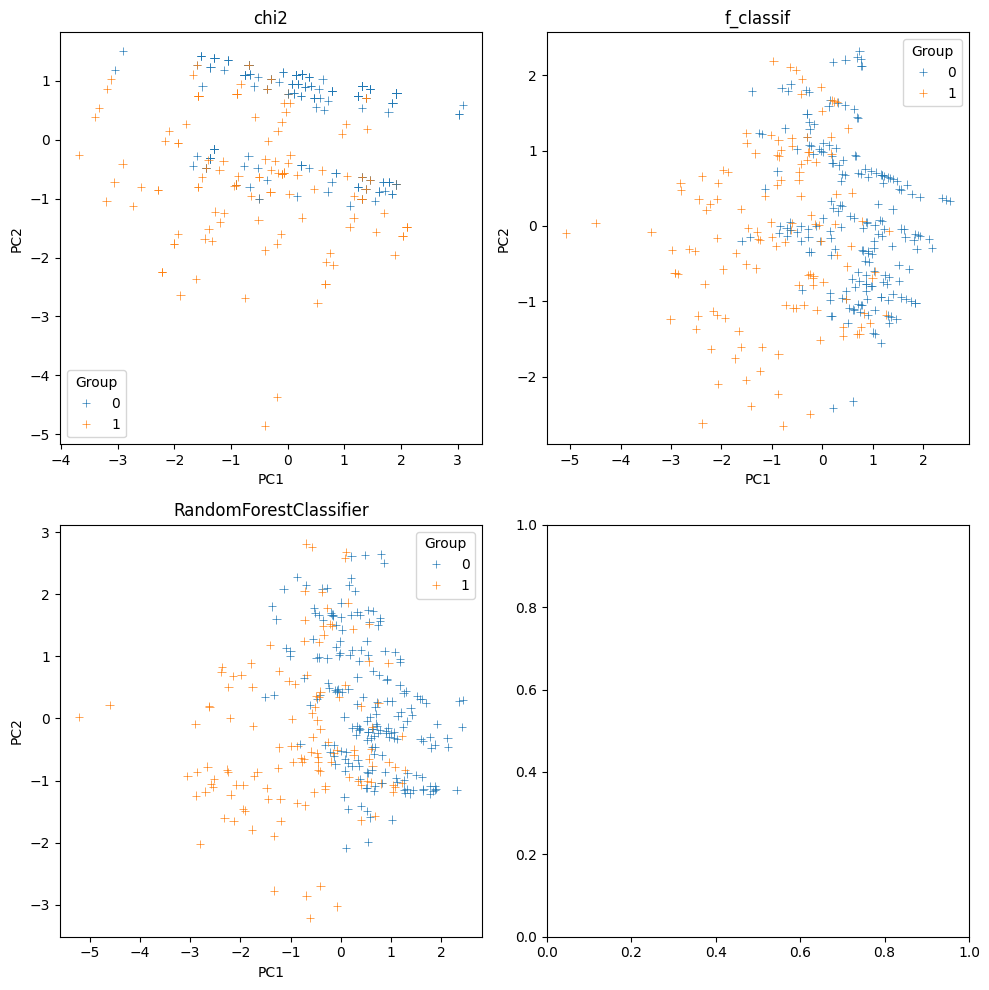

In [24]:
# Use PCA to reduce dimensionality
scaler = StandardScaler()

selected = {
	"chi2": df[["MMSE", "M/F", "EDUC", "SES"]],
	"f_classif": df[["MMSE", "M/F", "nWBV", "EDUC"]],
	"RandomForestClassifier": df[['MMSE', 'EDUC', 'eTIV', 'nWBV']]
}

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
scaler = StandardScaler()
pca = PCA(n_components=2)
for i, method in enumerate(selected):
    # Scale and apply PCA
    X_scaled = scaler.fit_transform(selected[method])
    X_pca = pca.fit_transform(X_scaled)
    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2']).reset_index(drop=True)
    pca_df["Group"] = df["Group"].reset_index(drop=True)

    # Determine row and column index for axs
    row = i // 2
    col = i % 2

    # Plot PCA results
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Group', ax=axs[row, col], style="Group", markers=["+", "+"])
    axs[row, col].set_title(method)

plt.tight_layout()
plt.show()